In [1]:
# Dataset: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image 
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
data_path = os.getcwd()

In [3]:
for i in range(classes):
    path = os.path.join(data_path,'dataset\\train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path+"\\"+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
data = np.array(data)
labels = np.array(labels)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [13]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True,
#     rankdir='TB', expand_nested=False, dpi=96
# )
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
epochs = 15
training = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 141s 288ms/step - loss: 1.5568 - accuracy: 0.6257 - val_loss: 0.2506 - val_accuracy: 0.9374
Epoch 2/15
491/491 [==============================] - 113s 230ms/step - loss: 0.4000 - accuracy: 0.8842 - val_loss: 0.0975 - val_accuracy: 0.9750
Epoch 3/15
491/491 [==============================] - 107s 218ms/step - loss: 0.2474 - accuracy: 0.9283 - val_loss: 0.0825 - val_accuracy: 0.9786
Epoch 4/15
491/491 [==============================] - 108s 219ms/step - loss: 0.2104 - accuracy: 0.9398 - val_loss: 0.0576 - val_accuracy: 0.9860
Epoch 5/15
491/491 [==============================] - 109s 221ms/step - loss: 0.1656 - accuracy: 0.9528 - val_loss: 0.0785 - val_accuracy: 0.9795
Epoch 6/15
491/491 [==============================] - 106s 217ms/step - loss: 0.1408 - accuracy: 0.9598 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 7/15
491/491 [==============================] - 108s 219ms/step - loss: 0.1316 - accuracy: 0.9616 - val_loss: 0.0461 -

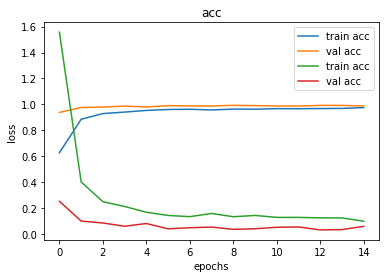

In [16]:
plt.figure(0)
plt.plot(training.history['accuracy'], label='train acc')
plt.plot(training.history['val_accuracy'], label='val acc')
plt.plot(training.history['loss'], label='train acc')
plt.plot(training.history['val_loss'], label='val acc')
plt.title('acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [17]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('dataset//Test.csv')
labels = y_test.ClassId.values
imgs = y_test.Path.values
data = []

In [19]:
for img in imgs:
    image = Image.open("dataset//"+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)
pred = model.predict_classes(X_test)
accuracy_score(labels, pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.9524940617577197